# PROJET 9 : Produisez une étude de marché avec R ou Python

![La Poule qui Chante](LAPOULEQUICHANTE.png)

## ETAPE 1: Importation des librairies et chargement des fichiers 

In [1]:
#Importations des librairies

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as stats
from scipy.stats import shapiro


import seaborn as sns
sns.set()

In [2]:
#Importation du fichier Disponibilite_Alimentaire_2017
Disponibilite_Alimentaire_2017 = pd.read_csv('Disponibilite_Alimentaire_2017.csv', sep=',')
#Importation du fichier Population_2000_2018
Population_2000_2018 = pd.read_csv('Population_2000_2018.csv', sep=',')
#Importation du fichier data_PIB_par_habitant_2017
Data_PIB_par_habitant_2017 = pd.read_csv('data_PIB_par_habitant_2017.csv', sep=',')
#Importation du fichier Stabilite_politique_2017
Stabilite_politique_2017 = pd.read_csv('Stabilite_politique_2017.csv', sep=',')

## ETAPE 2: Nettoyage et exploration des données

### 2.1) Exploration du Fichier Disponibilite_Alimentaire_2017

In [3]:
Disponibilite_Alimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


La table fournit diverses informations sur chaque produit alimentaire par pays, notamment sa disponibilité, ainsi que les quantités exportées et importées. Nous allons nous focaliser sur la viande de volaille. Ensuite, nous nous intéresserons à la colonne "éléments", qui regroupe les indicateurs pertinents, et nous la transformerons en pivot pour une meilleure analyse.









In [4]:
# Filtrer le dataframe sur la catégorie "viande de volailles"
Disponibilite_Alimentaire_2017 = Disponibilite_Alimentaire_2017.loc[Disponibilite_Alimentaire_2017['Produit'] == 'Viande de Volailles']
Disponibilite_Alimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [5]:
# Pivot de la table sur la colonne élément 
Disponibilite_Alimentaire_2017 = Disponibilite_Alimentaire_2017.pivot_table(index = ['Zone'], columns = 'Élément', values = 'Valeur', aggfunc = 'sum')
Disponibilite_Alimentaire_2017

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0


### 2.2) Exploration du Fichier Population_2000_2018

In [6]:
Population_2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
# Filtrer les données sur l'année 2017
Population_2017 = Population_2000_2018.loc[Population_2000_2018['Année'] == 2017]
Population_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [8]:
# Conservation uniquement des colonnes Zone et Valeur
Population_2017 = Population_2017.loc[:,['Zone','Valeur',]]
Population_2017

,Zone,Valeur
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409
...,...,...
4333,Venezuela (République bolivarienne du),29402.484
4352,Viet Nam,94600.648
4371,Yémen,27834.819
4390,Zambie,16853.599


In [9]:
# Renommer la colonne Valeur en Population
Population_2017 = Population_2017.rename(columns={'Valeur': 'Population'})

# Multiplication de la population par 1000 (mise à l'echelle réelle)
Population_2017['Population'] = Population_2017['Population'] * 1000

Population_2017.head()

,Zone,Population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0


### 2.3) Exploration du Fichier Data_PIB_par_habitant_2017

In [10]:
Data_PIB_par_habitant_2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,2956.8,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,14823.6,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,14229.3,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,13805.4,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,61563.6,X,Ciffre de sources internationales,NaN


In [11]:
# Conservation uniquement des colonnes Zone et Valeur
Data_PIB_par_habitant_2017 = Data_PIB_par_habitant_2017.loc[:,['Zone','Valeur']]
Data_PIB_par_habitant_2017

,Zone,Valeur
0,Afghanistan,2956.8
1,Afrique du Sud,14823.6
2,Albanie,14229.3
3,Algérie,13805.4
4,Allemagne,61563.6
...,...,...
185,Uruguay,29662.1
186,Vanuatu,3344.9
187,Viet Nam,10405.4
188,Zambie,3642.4


In [12]:
# Renommer la colonne valeur en PIB_par_habitant
Data_PIB_par_habitant_2017.rename(columns = {'Valeur': 'PIB_par_habitant'}, inplace=True)
Data_PIB_par_habitant_2017.head()

,Zone,PIB_par_habitant
0,Afghanistan,2956.8
1,Afrique du Sud,14823.6
2,Albanie,14229.3
3,Algérie,13805.4
4,Allemagne,61563.6


### 2.4) Exploration du Fichier Stabilite_politique_2017

In [13]:
Stabilite_politique_2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.79,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.37,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.92,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.57,X,Ciffre de sources internationales,NaN


In [14]:
# Conservation uniquement des colonnes Zone et Valeur

Stabilite_politique_2017 = Stabilite_politique_2017[
    Stabilite_politique_2017['Produit'] == "Stabilité politique et absence de violence/terrorisme (indice)"
][['Zone', 'Valeur']]

# Renommer la colonne valeur par Stabilite politique 
Stabilite_politique_2017.rename(columns = {'Valeur': 'Stabilite politique'}, inplace=True)
Stabilite_politique_2017.head()

,Zone,Stabilite politique
0,Afghanistan,-2.79
1,Afrique du Sud,-0.28
2,Albanie,0.37
3,Algérie,-0.92
4,Allemagne,0.57


## ETAPE 3:  Jointures des 4 fichiers

In [15]:
# Jointure entre les tables Disponibilite_Alimentaire_2017 et Population_2017
La_poule_qui_chante = Disponibilite_Alimentaire_2017.merge(Population_2017, on='Zone', how='left')

# Jointure entre les tables La_poule_qui_chante et Data_PIB_par_habitant_2017
La_poule_qui_chante = La_poule_qui_chante.merge(Data_PIB_par_habitant_2017, on='Zone', how='left')

# Jointure entre les tables Stabilite_politique_2017 avec le reste jointure gauche
La_poule_qui_chante = La_poule_qui_chante.merge(Stabilite_politique_2017, on='Zone', how='left')

La_poule_qui_chante.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population,PIB_par_habitant,Stabilite politique
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,...,55.0,2.0,28.0,0.0,NaN,NaN,0.0,36296113.0,2956.8,-2.79
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,...,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,57009756.0,14823.6,-0.28
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,...,47.0,NaN,13.0,0.0,NaN,NaN,4.0,2884169.0,14229.3,0.37
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,...,264.0,13.0,275.0,0.0,NaN,NaN,0.0,41389189.0,13805.4,-0.92
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,...,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658409.0,61563.6,0.57


### 3.1) Nettoyage et vérifications du dataframe final

In [16]:
# Suppression de l'index numérique pour le remplacer par les pays

La_poule_qui_chante = La_poule_qui_chante.set_index('Zone')

La_poule_qui_chante

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population,PIB_par_habitant,Stabilite politique
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0,36296113.0,2956.8,-2.79
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,57009756.0,14823.6,-0.28
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0,2884169.0,14229.3,0.37
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0,41389189.0,13805.4,-0.92
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658409.0,61563.6,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0,9487203.0,70048.5,0.60
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0,16785361.0,14552.4,-0.08
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0,325084756.0,66105.7,0.26


In [17]:
# Suppression des variables ne comportant pratiquement aucune valeur ou n'ayant pas d'intérêt pour l'analyse (la viande de volaille n'étant pas utilisée pour cela)
# Suppression également des variables qui sont trop identiques (exemple : Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité de matière grasse en quantité (g/personne/jour), Disponibilité de protéines en quantité (g/personne/jour)        

La_poule_qui_chante = La_poule_qui_chante.drop(columns = ['Aliments pour animaux','Alimentation pour touristes','Résidus','Variation de stock',
                        'Autres utilisations (non alimentaire)','Semences','Traitement','Pertes',
                        'Disponibilité de matière grasse en quantité (g/personne/jour)',
                        'Disponibilité alimentaire (Kcal/personne/jour)',
                        'Disponibilité de protéines en quantité (g/personne/jour)','Nourriture'])

La_poule_qui_chante


,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,PIB_par_habitant,Stabilite politique
Zone,,,,,,,,
Afghanistan,1.53,57.0,NaN,29.0,28.0,36296113.0,2956.8,-2.79
Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,57009756.0,14823.6,-0.28
Albanie,16.36,47.0,0.0,38.0,13.0,2884169.0,14229.3,0.37
Algérie,6.38,277.0,0.0,2.0,275.0,41389189.0,13805.4,-0.92
Allemagne,19.47,1739.0,646.0,842.0,1514.0,82658409.0,61563.6,0.57
...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,412.0,94.0,433.0,48.0,9487203.0,70048.5,0.60
Équateur,19.31,341.0,0.0,0.0,340.0,16785361.0,14552.4,-0.08
États-Unis d'Amérique,55.68,18266.0,3692.0,123.0,21914.0,325084756.0,66105.7,0.26


In [18]:
# Remplacements des valeurs manquantes par la valeur moyenne de chaque colonne.

La_poule_qui_chante = La_poule_qui_chante.fillna(La_poule_qui_chante.mean())
La_poule_qui_chante.isna().mean()

Disponibilité alimentaire en quantité (kg/personne/an)    0.0
Disponibilité intérieure                                  0.0
Exportations - Quantité                                   0.0
Importations - Quantité                                   0.0
Production                                                0.0
Population                                                0.0
PIB_par_habitant                                          0.0
Stabilite politique                                       0.0
dtype: float64

In [19]:
# Y a t-il des doublons ?

La_poule_qui_chante.duplicated().sum()

0

In [20]:
# Combien y a t'il de valeurs différentes par colonne ?

La_poule_qui_chante.nunique()

Disponibilité alimentaire en quantité (kg/personne/an)    169
Disponibilité intérieure                                  136
Exportations - Quantité                                    51
Importations - Quantité                                    85
Production                                                126
Population                                                172
PIB_par_habitant                                          164
Stabilite politique                                       132
dtype: int64

In [21]:
La_poule_qui_chante.describe(include='all')

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,PIB_par_habitant,Stabilite politique
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000
mean,20.213372,687.594118,132.185185,89.529412,725.190476,4.284175e+07,23164.362577,-0.081796
std,15.860311,2174.356574,454.815536,185.575135,2472.027193,1.530637e+08,22771.333103,0.879731
min,0.130000,2.000000,0.000000,0.000000,0.000000,5.204500e+04,1059.000000,-2.930000
25%,6.440000,31.500000,0.000000,3.000000,14.750000,2.874480e+06,6006.175000,-0.630000
50%,18.090000,105.000000,8.500000,16.000000,74.500000,9.757833e+06,15985.000000,-0.050000
75%,30.037500,376.500000,132.185185,85.250000,503.000000,3.013874e+07,32184.725000,0.605000
max,72.310000,18266.000000,4223.000000,1069.000000,21914.000000,1.421022e+09,135547.000000,1.560000


## ETAPE 4 : Analyse exploratoire des données

# Description des indicateurs

Avant de débuter l’analyse, il est essentiel de décrire chaque indicateur et de comprendre son utilité dans notre étude.

- **Zone** : Désigne le pays étudié.

- **Disponibilité alimentaire en quantité (kg/personne/an)** : Quantité moyenne de viande de volaille disponible par habitant chaque année. Une valeur élevée peut suggérer une autosuffisance alimentaire.

- **Disponibilité intérieure (en milliers de tonnes)** : Quantité totale de viande de volaille disponible dans le pays. Un pays avec une forte disponibilité est plus autonome et moins dépendant des importations.

- **Exportations - Quantité (en milliers de tonnes)** : Volume de viande de volaille exporté par le pays. Un niveau élevé indique une production excédentaire et une moindre dépendance aux importations.

- **Importations - Quantité (en milliers de tonnes)** : Volume de viande de volaille importé. Une valeur élevée suggère une demande interne supérieure à la production locale.

- **Production (en milliers de tonnes)** : Quantité totale de viande de volaille produite dans le pays. Une production faible peut signifier un besoin accru d’importations.

- **Population** : Nombre d’habitants du pays. Une population plus importante implique une demande potentielle plus élevée en viande de volaille.

- **PIB par habitant (en dollars américains, valeur nominale)** : Représente le niveau de richesse par habitant. Un PIB par habitant élevé indique un pouvoir d’achat plus important et une capacité accrue à consommer nos produits.

- **Stabilité politique** : Indicateur mesurant la stabilité politique du pays. Un score élevé signifie un environnement propice aux investissements et aux échanges commerciaux.


In [22]:
La_poule_qui_chante

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,PIB_par_habitant,Stabilite politique
Zone,,,,,,,,
Afghanistan,1.53,57.0,132.185185,29.0,28.0,36296113.0,2956.8,-2.79
Afrique du Sud,35.69,2118.0,63.000000,514.0,1667.0,57009756.0,14823.6,-0.28
Albanie,16.36,47.0,0.000000,38.0,13.0,2884169.0,14229.3,0.37
Algérie,6.38,277.0,0.000000,2.0,275.0,41389189.0,13805.4,-0.92
Allemagne,19.47,1739.0,646.000000,842.0,1514.0,82658409.0,61563.6,0.57
...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,412.0,94.000000,433.0,48.0,9487203.0,70048.5,0.60
Équateur,19.31,341.0,0.000000,0.0,340.0,16785361.0,14552.4,-0.08
États-Unis d'Amérique,55.68,18266.0,3692.000000,123.0,21914.0,325084756.0,66105.7,0.26


### 4.1) Analyse univarié

In [23]:
# Fonction pour créer le tableau récapitulatif des statistiques descriptives étendu
def summary_table_extended(data, columns):
    summary = []
    for column in columns:
        col_data = data[column].dropna()
        mode = col_data.mode()
        summary.append({
            "Variable": column,
            "Type": col_data.dtype,
            "Valeurs uniques": col_data.nunique(),
            "Valeurs manquantes": data[column].isnull().sum(),
            "Moyenne": col_data.mean(),
            "Ecart-type": col_data.std(),
            "Variance": col_data.var(),
            "Coeff de variation (%)": (col_data.std() / col_data.mean()) * 100 if col_data.mean() != 0 else None,
            "Médiane": col_data.median(),
            "Mode": mode.iloc[0] if not mode.empty else None,
            "Minimum": col_data.min(),
            "Maximum": col_data.max(),
            "1er quartile": col_data.quantile(0.25),
            "3ème quartile": col_data.quantile(0.75)
        })
    return pd.DataFrame(summary)

# Liste des colonnes numériques dans le DataFrame
numerical_columns = [
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité intérieure",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Production",
    "Population",
    "PIB_par_habitant",
    "Stabilite politique"
]

# Création du tableau récapitulatif étendu
summary_df_extended_corrected = summary_table_extended(La_poule_qui_chante, numerical_columns)

# Affichage du tableau
display(summary_df_extended_corrected)


,Variable,Type,Valeurs uniques,Valeurs manquantes,Moyenne,Ecart-type,Variance,Coeff de variation (%),Médiane,Mode,Minimum,Maximum,1er quartile,3ème quartile
0,Disponibilité alimentaire en quantité (kg/pers...,float64,169,0,2.021337e+01,1.586031e+01,2.515495e+02,78.464449,18.09,4.450000,0.13,7.231000e+01,6.440,3.003750e+01
1,Disponibilité intérieure,float64,136,0,6.875941e+02,2.174357e+03,4.727827e+06,316.226756,105.00,7.000000,2.00,1.826600e+04,31.500,3.765000e+02
2,Exportations - Quantité,float64,51,0,1.321852e+02,4.548155e+02,2.068572e+05,344.074516,8.50,0.000000,0.00,4.223000e+03,0.000,1.321852e+02
3,Importations - Quantité,float64,85,0,8.952941e+01,1.855751e+02,3.443813e+04,207.278403,16.00,0.000000,0.00,1.069000e+03,3.000,8.525000e+01
4,Production,float64,126,0,7.251905e+02,2.472027e+03,6.110918e+06,340.879710,74.50,1.000000,0.00,2.191400e+04,14.750,5.030000e+02
5,Population,float64,172,0,4.284175e+07,1.530637e+08,2.342850e+16,357.276945,9757833.00,52045.000000,52045.00,1.421022e+09,2874480.250,3.013874e+07
6,PIB_par_habitant,float64,164,0,2.316436e+04,2.277133e+04,5.185336e+08,98.303301,15985.00,23164.362577,1059.00,1.355470e+05,6006.175,3.218473e+04
7,Stabilite politique,float64,132,0,-8.179641e-02,8.797310e-01,7.739267e-01,-1075.513037,-0.05,-0.081796,-2.93,1.560000e+00,-0.630,6.050000e-01


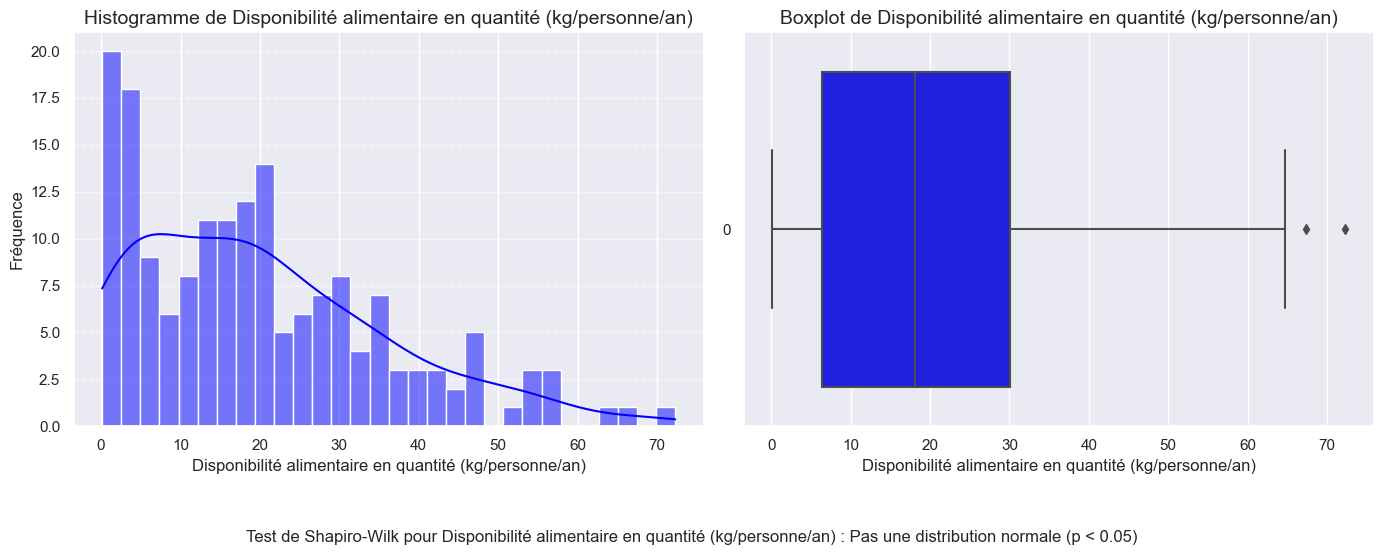

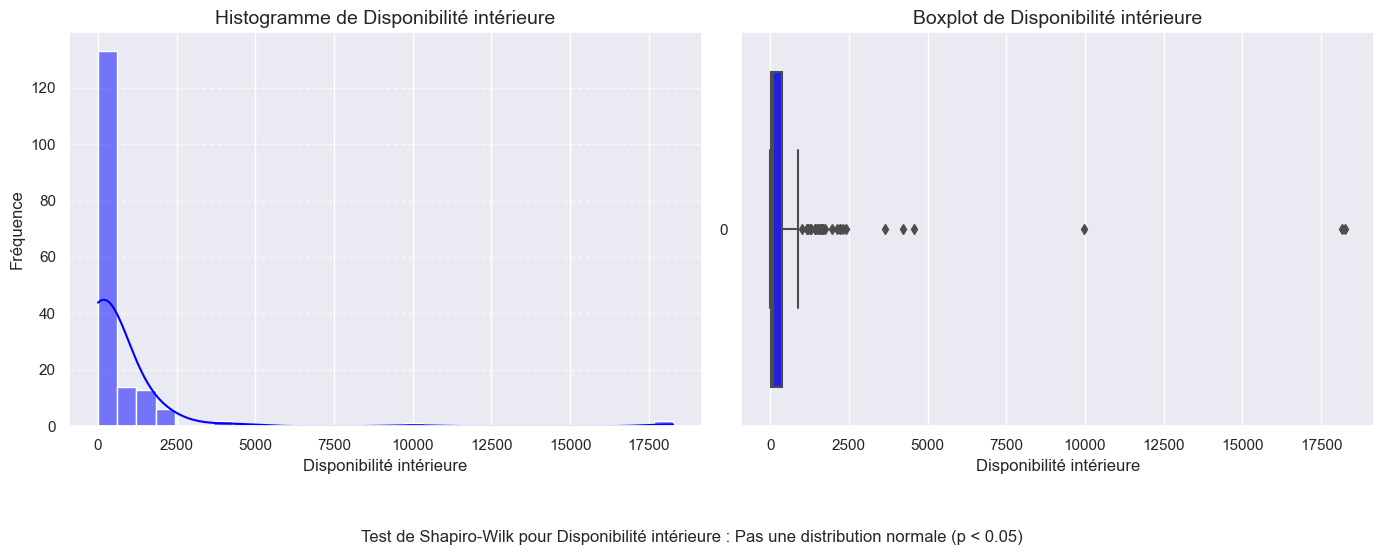

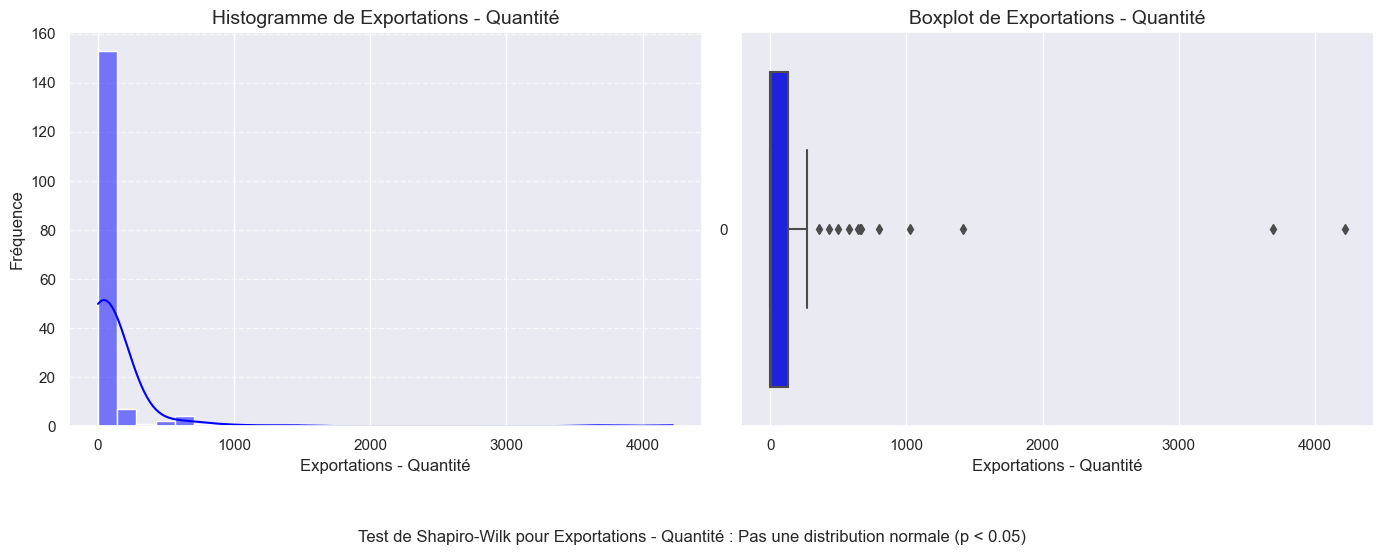

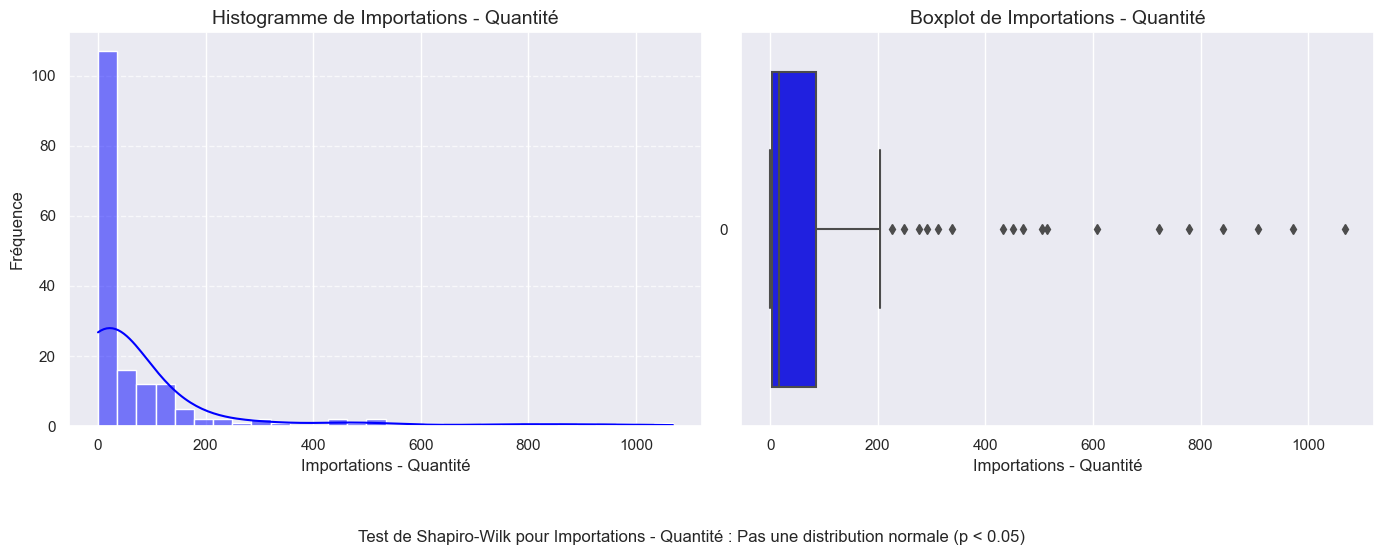

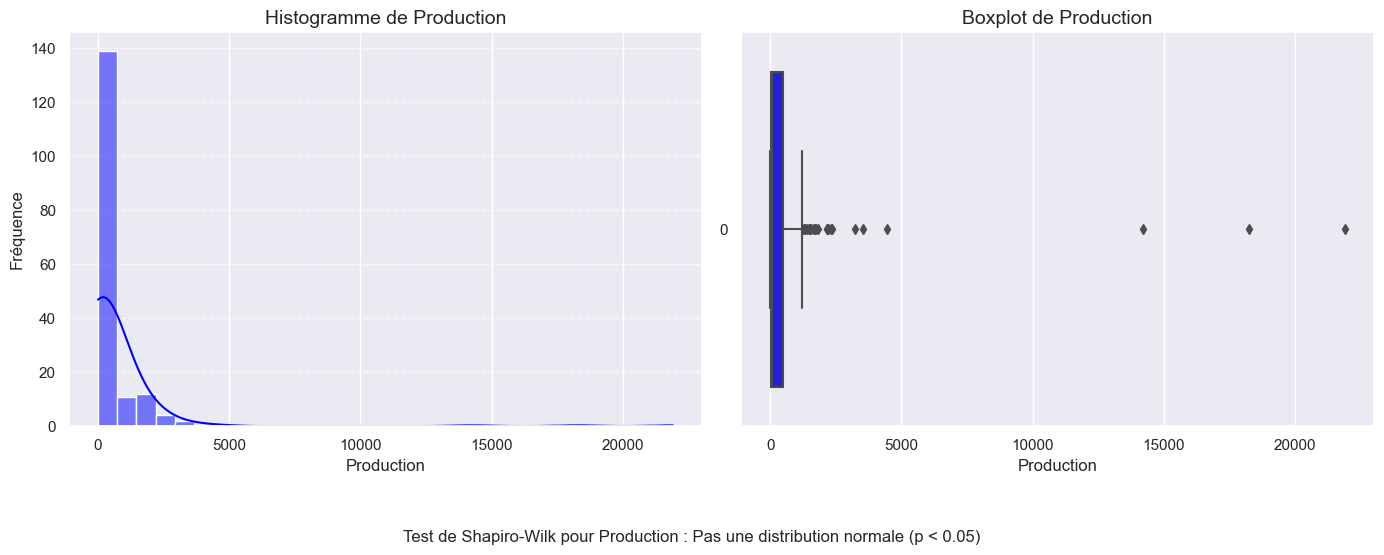

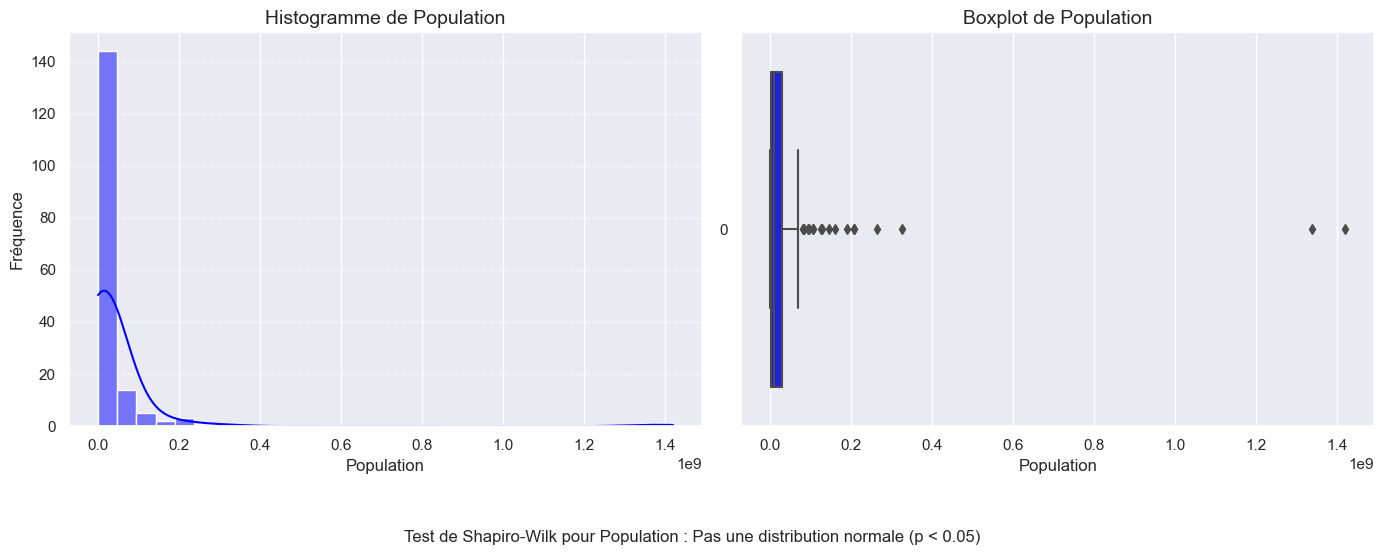

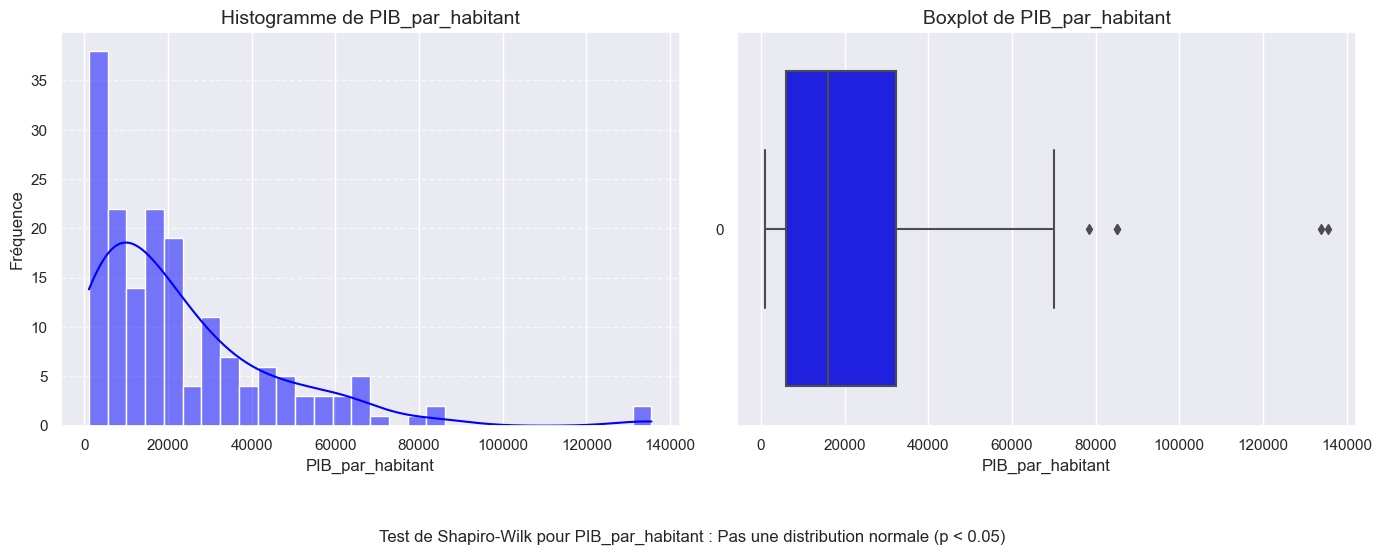

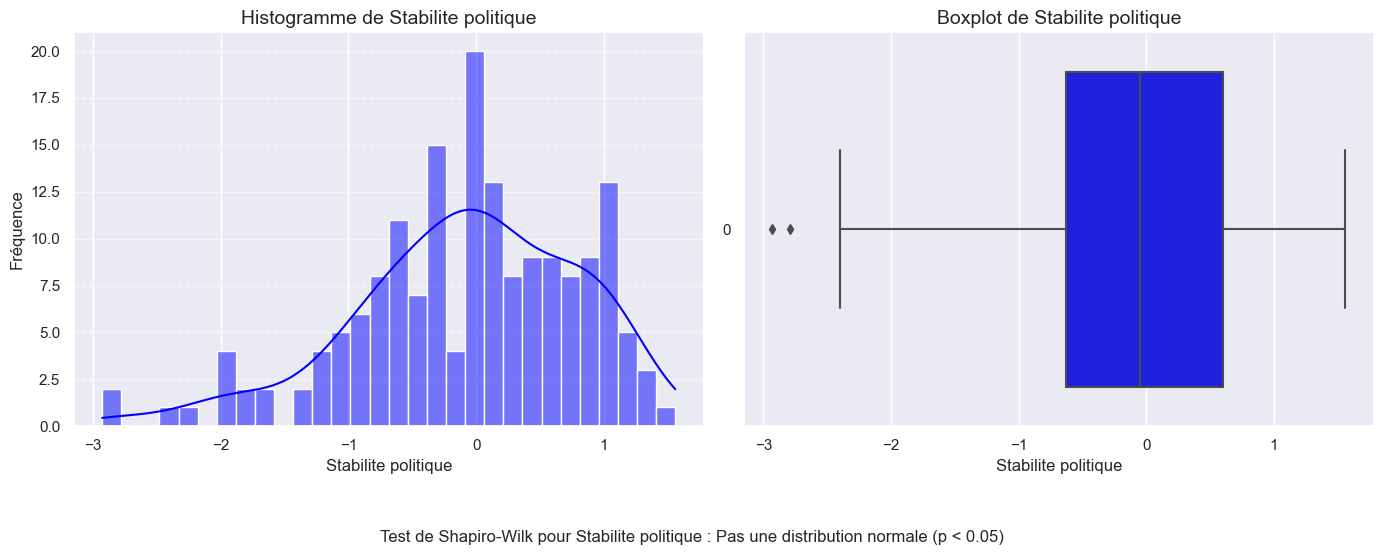

In [24]:
# Liste des colonnes numériques à analyser
numerical_columns = [
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité intérieure",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Production",
    "Population",
    "PIB_par_habitant",
    "Stabilite politique"
]

# Création d'une grille avec histogramme, boxplot, et phrase de normalité pour chaque variable
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogramme avec la courbe de densité
    sns.histplot(La_poule_qui_chante[column], kde=True, bins=30, color="blue", ax=axes[0])
    axes[0].set_title(f"Histogramme de {column}", fontsize=14)
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel("Fréquence", fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Boxplot
    sns.boxplot(La_poule_qui_chante[column], ax=axes[1], color="blue", orient='h')
    axes[1].set_title(f"Boxplot de {column}", fontsize=14)
    axes[1].set_xlabel(column, fontsize=12)
    
    # Test de Shapiro-Wilk
    stat, p_value = shapiro(La_poule_qui_chante[column].dropna())
    if p_value < 0.05:
        normality = "Pas une distribution normale (p < 0.05)"
    else:
        normality = "Suit une distribution normale (p >= 0.05)"
    
    # Ajouter la phrase de normalité sous les graphiques
    plt.figtext(0.5, -0.1, f"Test de Shapiro-Wilk pour {column} : {normality}", 
                wrap=True, horizontalalignment='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()


### 📌 Quand choisir IQR ou Z-score ?

✅ **Utiliser la méthode des interquartiles (IQR) si :**  
- Les **données ne suivent pas une distribution normale** (asymétrie, présence de valeurs extrêmes).  
- On veut une méthode **robuste aux outliers**.  
- On travaille avec des **données économiques ou des flux commerciaux** (ex. import/export).  

✅ **Utiliser le Z-score si :**  
- Les **données suivent une distribution normale**.  
- On veut une **méthode statistique classique** avec des seuils basés sur la moyenne.  
- On souhaite détecter **des outliers dans des données centrées** (ex. scores de tests, taille/poids de personnes).  

**Dans le cas de mon etude il est plus judiceux et adaptés d'utiliser la methode des interquatilles**

## Détection et etude des outliers avec la methode des interquatilles

In [25]:
# 📌 Application de la méthode des interquartiles (IQR) pour l'étude des outliers

variables = ["Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité intérieure",
             "Exportations - Quantité", "Importations - Quantité", "Production", "PIB_par_habitant"]


# Calcul des quartiles et de l'IQR pour chaque variable
Q1 = La_poule_qui_chante[variables].quantile(0.25)
Q3 = La_poule_qui_chante[variables].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour identifier les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers = (La_poule_qui_chante[variables] < lower_bound) | (La_poule_qui_chante[variables] > upper_bound)

# Création d'un DataFrame contenant uniquement les valeurs aberrantes détectées
outliers_detected = La_poule_qui_chante[outliers.any(axis=1)]

# Nombre total de pays contenant des outliers
nbr_outliers = outliers_detected.shape[0]

# Calcul des valeurs minimales et maximales des outliers par variable
min_values = outliers_detected[variables].min()
max_values = outliers_detected[variables].max()

# 📊 Résumé des outliers détectés
print(f"📌 Nombre de pays ayant des valeurs aberrantes : {nbr_outliers}\n")

print("🔍 Valeurs extrêmes par variable :")
for var in variables:
    print(f" - {var}: min = {min_values[var]:.2f}, max = {max_values[var]:.2f}")



📌 Nombre de pays ayant des valeurs aberrantes : 45

🔍 Valeurs extrêmes par variable :
 - Disponibilité alimentaire en quantité (kg/personne/an): min = 2.22, max = 72.31
 - Disponibilité intérieure: min = 8.00, max = 18266.00
 - Exportations - Quantité: min = 0.00, max = 4223.00
 - Importations - Quantité: min = 0.00, max = 1069.00
 - Production: min = 0.00, max = 21914.00
 - PIB_par_habitant: min = 5191.90, max = 135547.00


In [26]:
# Comparaison des valeurs extrêmes avec les statistiques globales
stats_comparaison = pd.DataFrame(columns=["Moyenne", "Médiane", "Min", "Max"])

for var in variables:
    stats_comparaison.loc[var] = [
        La_poule_qui_chante[var].mean(),
        La_poule_qui_chante[var].median(),
        La_poule_qui_chante[var].min(),
        La_poule_qui_chante[var].max()
    ]

# Réinitialisation temporaire de l'index pour accéder à 'Zone'
La_poule_qui_chante_reset = La_poule_qui_chante.reset_index()

# Étape 1 : Visualisation des pays avec valeurs extrêmes par variable
outliers_analysis = {}

for var in variables:
    top_5 = La_poule_qui_chante_reset.nlargest(5, var)[["Zone", var]]
    bottom_5 = La_poule_qui_chante_reset.nsmallest(5, var)[["Zone", var]]
    outliers_analysis[var] = {"Top 5": top_5, "Bottom 5": bottom_5}

# Affichage des pays avec les valeurs les plus élevées et les plus faibles
for var, data in outliers_analysis.items():
    print(f"\n🔍 Pays avec les valeurs les PLUS ÉLEVÉES pour {var}:")
    print(data["Top 5"])
    
    print(f"\n🔍 Pays avec les valeurs les PLUS FAIBLES pour {var}:")
    print(data["Bottom 5"])



🔍 Pays avec les valeurs les PLUS ÉLEVÉES pour Disponibilité alimentaire en quantité (kg/personne/an):
                                Zone  \
134  Saint-Vincent-et-les Grenadines   
72                            Israël   
136                            Samoa   
135                     Sainte-Lucie   
133             Saint-Kitts-et-Nevis   

     Disponibilité alimentaire en quantité (kg/personne/an)  
134                                              72.31       
72                                               67.39       
136                                              64.77       
135                                              56.69       
133                                              55.77       

🔍 Pays avec les valeurs les PLUS FAIBLES pour Disponibilité alimentaire en quantité (kg/personne/an):
         Zone  Disponibilité alimentaire en quantité (kg/personne/an)
170  Éthiopie                                               0.13     
149     Tchad                            

### 📌 Interprétation des résultats de l'étude des outliers

#### 1. **Identification des outliers avec la méthode des interquartiles (IQR)**
Le calcul des **valeurs aberrantes** sur les variables sélectionnées a montré qu'un **certain nombre de pays** ont des valeurs extrêmes, que ce soit en termes de production, de consommation alimentaire ou de PIB par habitant. Ces pays sont catégorisés comme des outliers en raison de leur **forte consommation** ou de **leur forte production**, ce qui peut être justifié par des différences économiques, sociales et commerciales.

Les **USA, Chine, Brésil** se distinguent comme des **leaders dans la production, l'exportation et la consommation** de volaille, tandis que des pays comme **le Japon, le Mexique** et **Hong Kong** sont de **grands importateurs** de volaille. D'autre part, certains pays moins développés ou plus petits (ex : **Tchad, Niger**) présentent des valeurs très faibles, tant en termes de consommation alimentaire que de production.

#### 2. **Valeurs extrêmes par variable**
- **Disponibilité alimentaire (kg/personne/an)** : Des **valeurs très élevées** pour des pays comme **Israël** ou **Saint-Vincent** et des **valeurs faibles** pour des pays d'Afrique subsaharienne.
- **Disponibilité intérieure** : Les **USA, Brésil, Chine** sont de **gros producteurs**, ce qui justifie leurs chiffres élevés.
- **Exportations et Importations** : **Les USA et le Brésil dominent l’exportation**, tandis que des pays comme **Japon** et **Mexique** font partie des plus gros importateurs.
- **PIB par habitant** : Des **valeurs extrêmement élevées** pour des pays comme **Luxembourg, Irlande**, et des **valeurs plus faibles** pour des pays africains comme **République Centrafricaine**.

#### 3. **Approche stratégique pour le projet**
- **Marchés avec des valeurs extrêmes élevées** : Ces pays sont **des cibles clés** pour des produits de qualité supérieure ou spécialisés. Des pays comme les **USA, Japon, Chine, et Brésil** sont de **bons marchés pour l'exportation**.
- **Marchés avec des valeurs extrêmes faibles** : Les pays ayant des **valeurs faibles** en termes de consommation alimentaire ou de PIB peuvent être des **marchés plus difficiles à pénétrer**, mais peuvent aussi représenter une **opportunité pour des produits plus abordables**.

#### 4. **Recommandations** :
- **Focus sur les pays importateurs de volaille** comme le Japon et le Mexique.
- **Cibler des marchés de niche** dans les pays avec un **pouvoir d'achat élevé** (Luxembourg, Irlande).
- **Anticiper la concurrence des producteurs dominants** (Brésil, USA) et chercher à se différencier sur la qualité ou l'approvisionnement local.

### 📌 Prochaine étape : **Normalisation des données**

#### 1. **Pourquoi normaliser les données ?**
La normalisation des données est une étape essentielle avant de procéder à des analyses comme le **clustering**, surtout quand il y a des **valeurs extrêmes** qui peuvent fausser les résultats. Étant donné que des variables comme le **PIB par habitant, la production** et **les exportations** peuvent avoir des échelles très différentes, la **normalisation** permet d'assurer que toutes les variables auront un **poids égal** dans l’analyse.

**Nous avons décidé d'appliquer le scaling des données par standardisation**, une méthode qui consiste à centrer les données en soustrayant la moyenne de chaque variable, ce qui permet de les recentrer autour de 0, et à réduire leur dispersion en divisant chaque variable par son écart-type, afin qu'elles aient une variance égale à 1. Cela permet d'uniformiser l'échelle des données, ce qui est particulièrement utile pour les modèles sensibles aux échelles des variables."

#### Conclusion :
La méthode **IQR** nous a permis de bien **comprendre** les disparités entre les pays en termes de production, de consommation et d’exportation de volaille, et de mieux appréhender les **marchés à fort potentiel** ainsi que ceux plus complexes. Cela nous guide dans les choix stratégiques pour l'exportation de volaille, en nous permettant de mieux identifier les **opportunités** et les **obstacles**.


### À l'issue de cette analyse univariée, voici certains points clés à retenir :

1. **Forte variabilité des indicateurs entre les pays :**

   - Les variables présentent une dispersion significative, comme le montrent les coefficients de variation élevés. Cette variabilité illustre les disparités entre les pays en termes de production, exportations, importations, et disponibilité alimentaire.

---

2. **Asymétrie marquée des distributions :**

   - La majorité des variables ont une distribution asymétrique avec des valeurs extrêmes (outliers). Par exemple, les exportations, les importations, et la production sont dominées par quelques pays leaders, tandis que la majorité des pays affichent des valeurs nettement inférieures.

---

3. **Présence de pays leaders :**

   - Certains pays se démarquent comme des acteurs majeurs de la production et des exportations alimentaires mondiales. Ils influencent fortement les moyennes globales.

---

4. **Pays vulnérables :**

   - Quelques pays montrent une faible disponibilité alimentaire par personne, ce qui pourrait indiquer des défis liés à l'insécurité alimentaire ou à une production insuffisante pour subvenir aux besoins locaux.

---

5. **Importance des disparités économiques :**

   - Le PIB par habitant révèle de grandes inégalités entre les pays, ce qui influence directement leur capacité à produire, importer ou accéder à des ressources alimentaires.

---

6. **Impact de la stabilité politique :**

   - Les pays avec une stabilité politique faible sont susceptibles d’avoir des performances réduites en matière de production et d’échanges alimentaires, affectant ainsi leur sécurité alimentaire.

---

7. **Rôle des pays très peuplés :**

   - Les pays avec une population très importante influencent les moyennes globales. Cependant, leur performance relative en termes de disponibilité alimentaire par personne peut varier selon leur production ou dépendance aux importations.

---

8. **Distribution alimentaire :**

   - Bien que certains pays aient une abondance de ressources, d’autres semblent dépendre fortement des importations pour répondre à leur demande, reflétant un déséquilibre dans la répartition mondiale des ressources.

---

### Synthèse générale :
L’analyse met en évidence un système alimentaire mondial marqué par des inégalités importantes et des dépendances entre les pays. Ces résultats suggèrent qu’il serait pertinent d’explorer les relations entre les variables, par exemple en étudiant les corrélations ou en regroupant les pays en clusters selon leurs caractéristiques.

### 4.1) Analyse bivarié

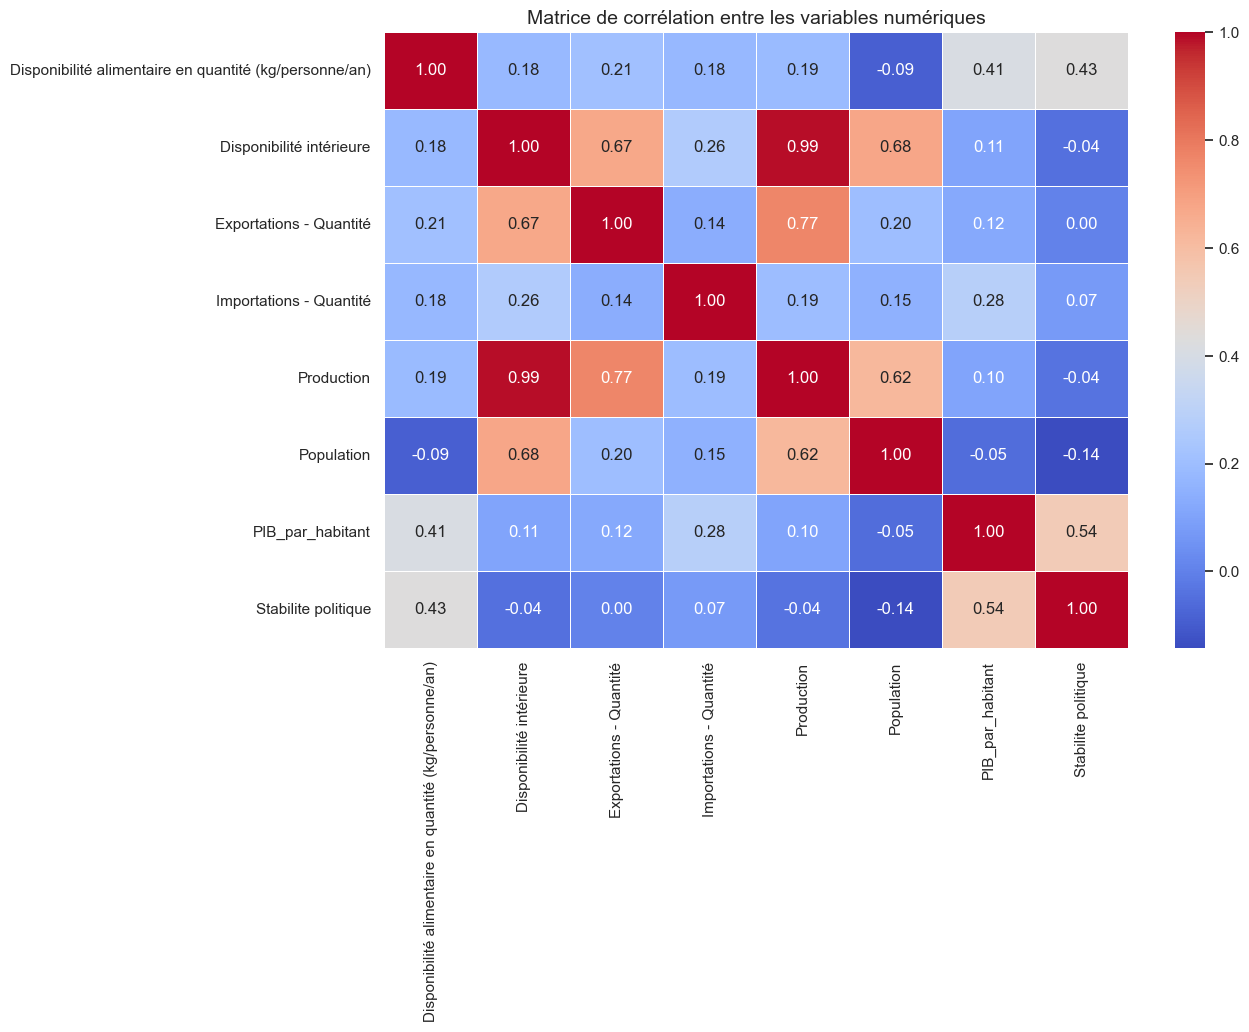

In [27]:
# Matrice de corrélation entre les variables numériques
correlation_matrix = La_poule_qui_chante[numerical_columns].corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques", fontsize=14)
plt.show()



La matrice de corrélation montre des corrélations assez fortes entre certaines variables, telles que la production et la disponibilité intérieure (0.99), ainsi que la production et les exportations (0.77). Cependant, malgré ces corrélations élevées, il est important de conserver toutes les variables dans l'analyse, car chacune d'elles apporte des informations distinctes et permet de mieux comprendre les différents aspects du système alimentaire mondial. La forte corrélation ne justifie pas forcément leur élimination, car chaque variable peut avoir un rôle unique dans l'analyse multivariée.

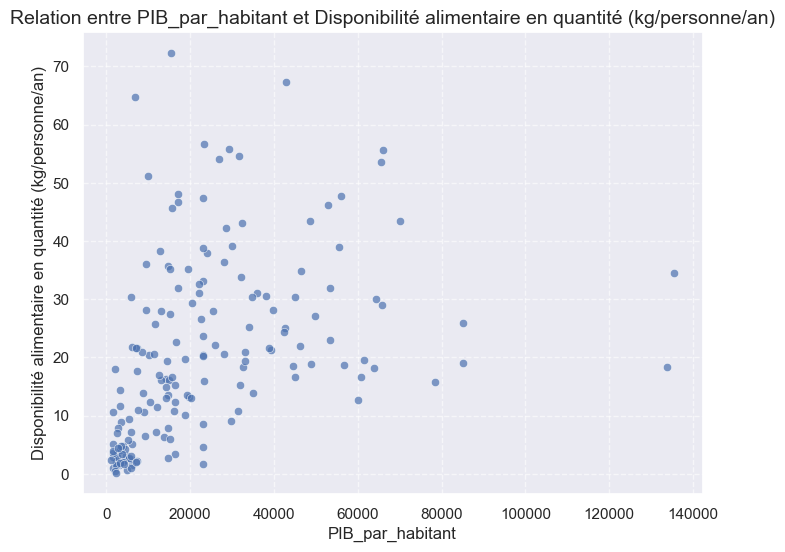

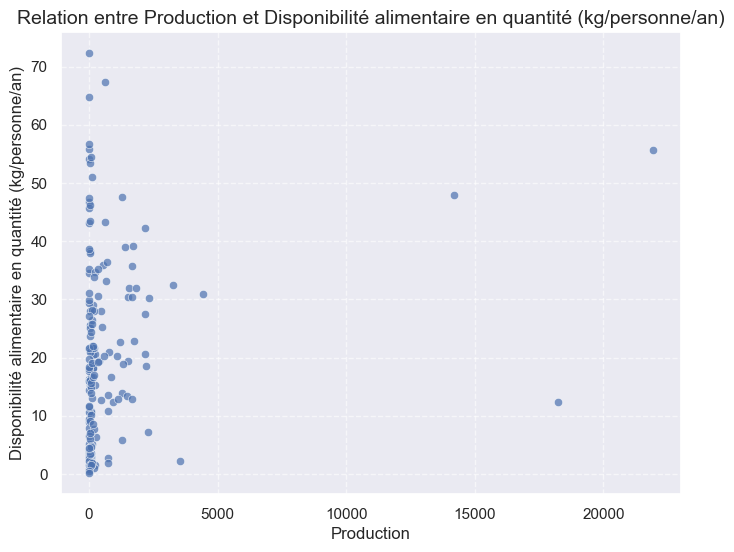

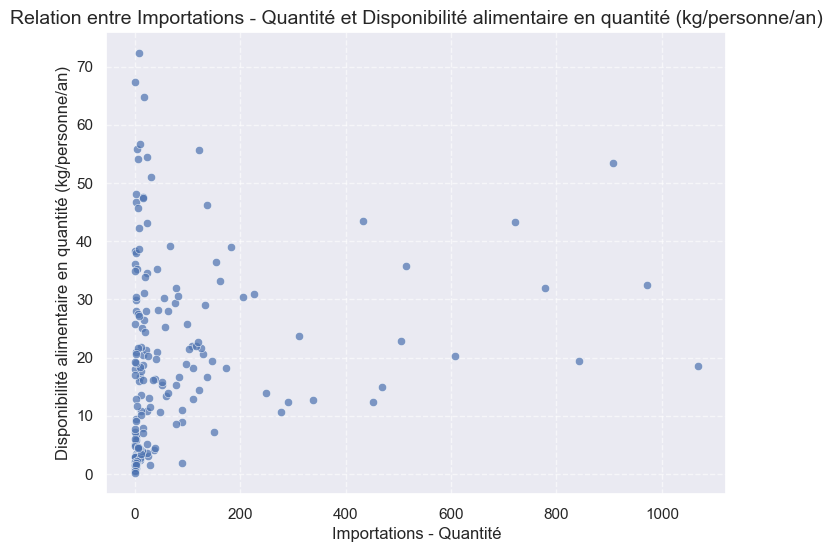

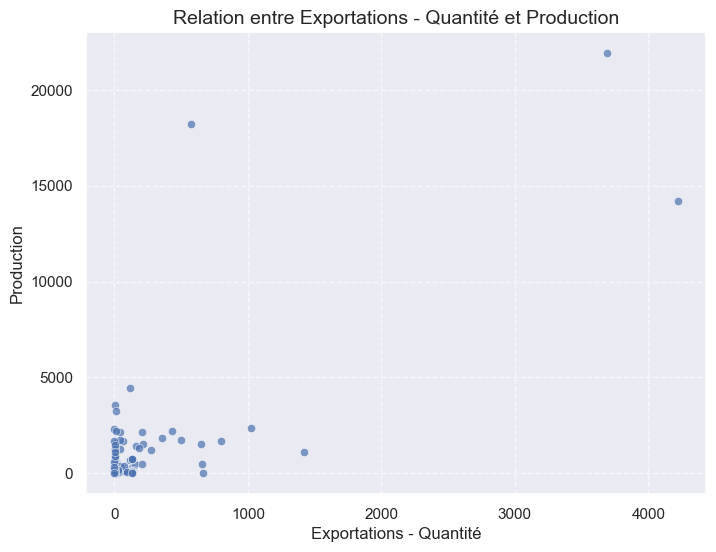

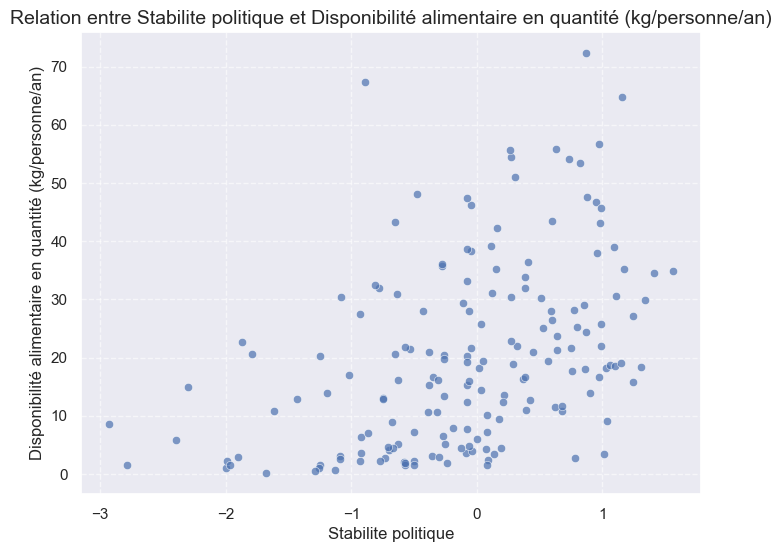

In [28]:
# Analyse de relations entre certaines variables clés avec des scatter plots
selected_pairs = [
    ("PIB_par_habitant", "Disponibilité alimentaire en quantité (kg/personne/an)"),
    ("Production", "Disponibilité alimentaire en quantité (kg/personne/an)"),
    ("Importations - Quantité", "Disponibilité alimentaire en quantité (kg/personne/an)"),
    ("Exportations - Quantité", "Production"),
    ("Stabilite politique", "Disponibilité alimentaire en quantité (kg/personne/an)") 
    ]
for x_var, y_var in selected_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=La_poule_qui_chante, x=x_var, y=y_var, alpha=0.7)
    plt.title(f"Relation entre {x_var} et {y_var}", fontsize=14)
    plt.xlabel(x_var, fontsize=12)
    plt.ylabel(y_var, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


### **Interprétation des Corrélations Clés pour l’Exportation de Poulets**

#### * Corrélation forte entre production et exportations**
- **Les pays ayant une forte production agricole sont souvent aussi des exportateurs majeurs.**
- **Implication pour l’exportation de poulets** :  
  → Ces pays sont **peu susceptibles d’être de bons marchés d’exportation**, car ils sont **autosuffisants**.

---

#### * Corrélation modérée entre importations et disponibilité alimentaire**
- **Certains pays importent davantage pour combler leur déficit alimentaire.**
- **Implication** :  
  → Ces pays sont de **bons candidats pour l’exportation de volaille**, s’ils **importent déjà des protéines animales**.

---

#### * Corrélation modérée entre PIB par habitant et disponibilité alimentaire**
- **Plus un pays est riche, plus sa disponibilité alimentaire est élevée, mais ce n’est pas systématique.**
- **Implication** :  
  → Certains pays à **fort PIB** peuvent **encore avoir une demande en importation de volaille**, notamment si leur production locale est insuffisante.
  
#### * Corrélation modérée entre Stabilite politique et disponibilité alimentaire**  
- **Les pays politiquement stables ont généralement une meilleure disponibilité alimentaire, ce qui en fait des marchés plus sûrs pour l’exportation de poulets. En revanche, les pays instables, bien que parfois dépendants des importations, présentent des risques commerciaux liés aux infrastructures, aux réglementations et à la logistique.**


In [29]:
#Export du dataframe La_poule_qui_chante en fichier csv
La_poule_qui_chante.to_csv('La_poule_qui_chante.csv', index=True)

Nous passons maintenant au second notebook.